# EDA

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import scipy.stats as stats
from scipy.stats import shapiro
from scipy.stats import chi2_contingency
from sklearn import preprocessing

In [3]:
import seaborn as sns
%matplotlib inline
#123

In [4]:
df = pd.read_csv("data/train.csv", sep=";")
df.head()

,Time,CellName,PRBUsageUL,PRBUsageDL,meanThr_DL,meanThr_UL,maxThr_DL,maxThr_UL,meanUE_DL,meanUE_UL,maxUE_DL,maxUE_UL,maxUE_UL+DL,Unusual
0,10:45,3BLTE,12.3848,1.4019,0.3927,0.0438,16.6522,0.6806,1.1293,1.0491,5,3,8,1
1,9:45,1BLTE,22.0438,2.0016,0.5620,0.2697,10.3994,1.1771,1.4480,1.1630,6,5,11,1
2,7:45,9BLTE,0.5105,0.4258,0.0152,0.0106,0.2755,0.1685,1.0379,1.0535,1,2,3,1
3,2:45,4ALTE,1.9963,1.1513,0.9908,0.0245,64.7465,0.8747,1.0766,1.0526,3,2,5,1
4,3:30,10BLTE,0.3030,0.4040,0.0160,0.0130,0.3480,0.1680,1.0110,1.0110,2,1,3,0


In [5]:
df.shape

(36904, 14)

In [6]:
df_test = pd.read_csv("data/test.csv", sep=";")
df_test.head()

,Time,CellName,PRBUsageUL,PRBUsageDL,meanThr_DL,meanThr_UL,maxThr_DL,maxThr_UL,meanUE_DL,meanUE_UL,maxUE_DL,maxUE_UL,maxUE_UL+DL
0,3:00,6ALTE,3.8177,1.5251,0.5829,0.0445,23.1688,0.7669,1.0262,0.0100,3,3,6
1,20:30,6ULTE,2.0210,3.3350,0.5690,0.0750,29.2650,1.0490,1.3140,0.0100,6,3,9
2,11:30,2ALTE,0.5050,0.4040,0.0140,0.0100,0.2270,0.0970,1.0110,0.0100,2,1,3
3,6:45,3CLTE,1.0110,0.5050,0.2380,0.0210,20.9620,0.6090,1.0110,1.0110,2,1,3
4,15:45,6CLTE,4.0269,0.5104,0.0807,0.0414,3.9317,1.7811,1.0575,0.0107,3,2,5


In [7]:
df_test.shape

(9158, 13)

In [8]:
#Checking for missing values
print(f"Null values for training data:\n{df.isnull().sum()}")
print(f"\nNull values for testing data:\n{df_test.isnull().sum()}")

Null values for training data:
Time           0
CellName       0
PRBUsageUL     0
PRBUsageDL     0
meanThr_DL     0
meanThr_UL     0
maxThr_DL      0
maxThr_UL      0
meanUE_DL      0
meanUE_UL      0
maxUE_DL       0
maxUE_UL       0
maxUE_UL+DL    0
Unusual        0
dtype: int64

Null values for testing data:
Time           0
CellName       0
PRBUsageUL     0
PRBUsageDL     0
meanThr_DL     0
meanThr_UL     0
maxThr_DL      0
maxThr_UL      0
meanUE_DL      0
meanUE_UL      0
maxUE_DL       0
maxUE_UL       0
maxUE_UL+DL    0
dtype: int64


In [9]:
#obtaining unique cells
Cells = []

for i in df.CellName:
    if i not in Cells:
        Cells = np.append(Cells, i)

In [44]:
#Creating a new feature "Time from midnight"

Time = pd.to_datetime(df.Time, format = '%H:%M')

df["Time_from_midnight"] = Time.dt.hour * 60 + Time.dt.minute



In [45]:
#Splitting features into features with anomalous and normal behaviour
Anomalous_df = df.groupby('Unusual').get_group(1)
Normal_df = df.groupby('Unusual').get_group(0)

In [11]:
Anomalous_df.shape

(10183, 14)

In [12]:
Normal_df.shape

(26721, 14)

/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


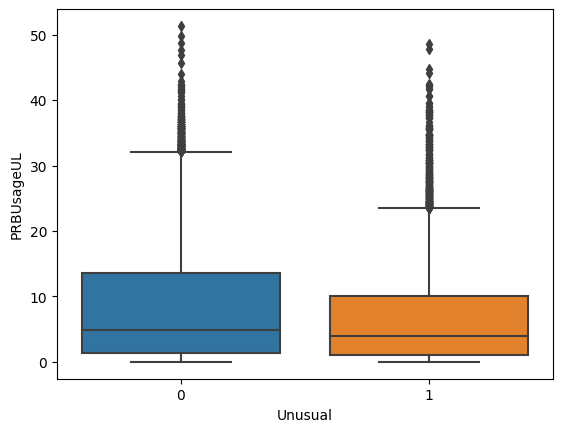

/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


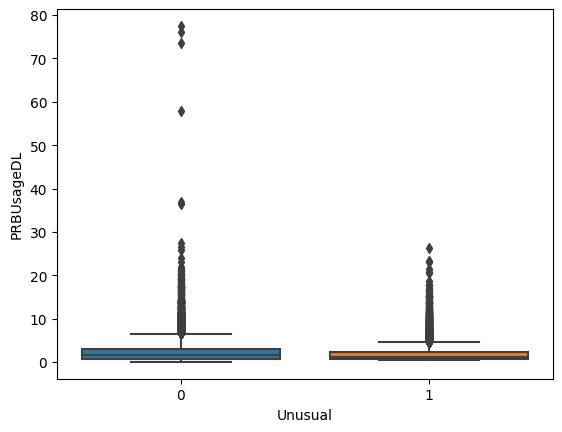

/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


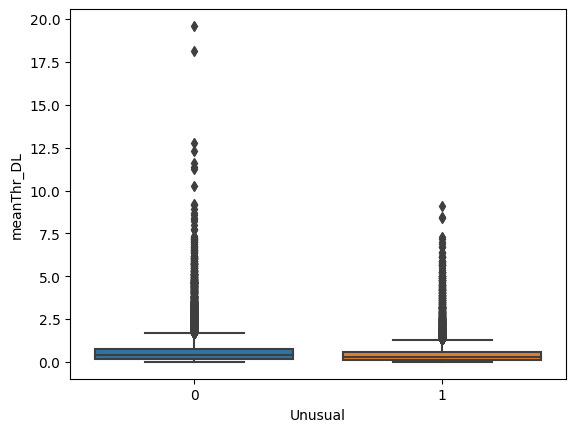

/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


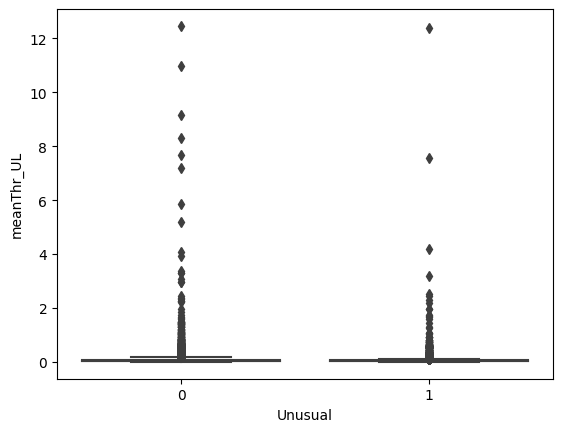

/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


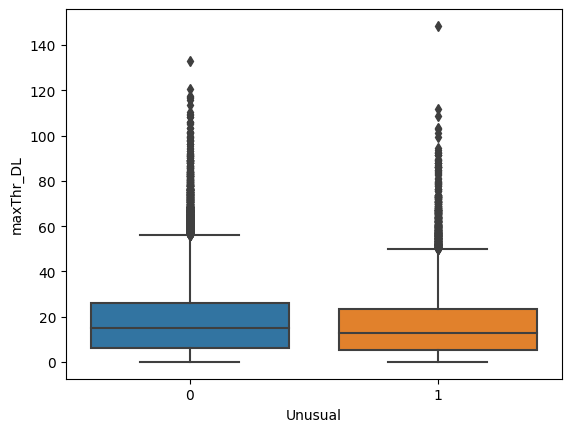

/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


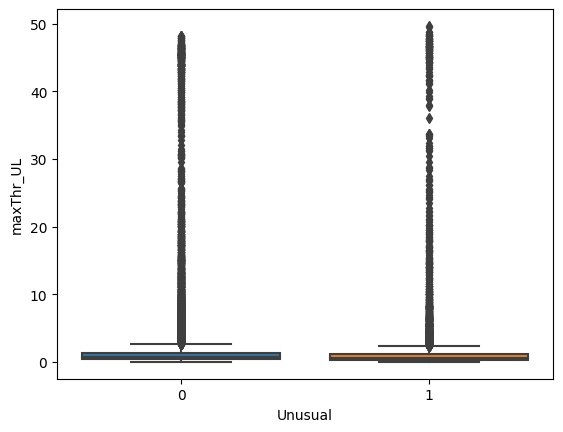

/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


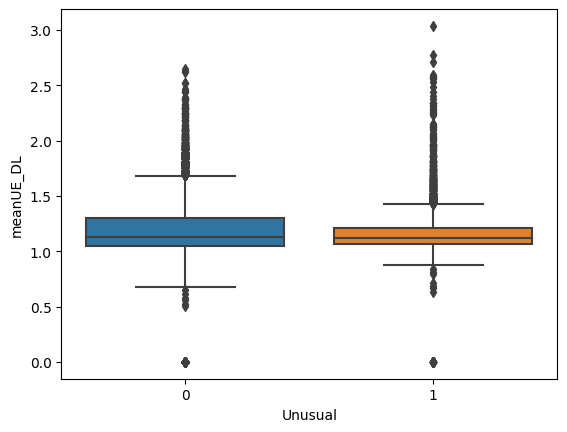

/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


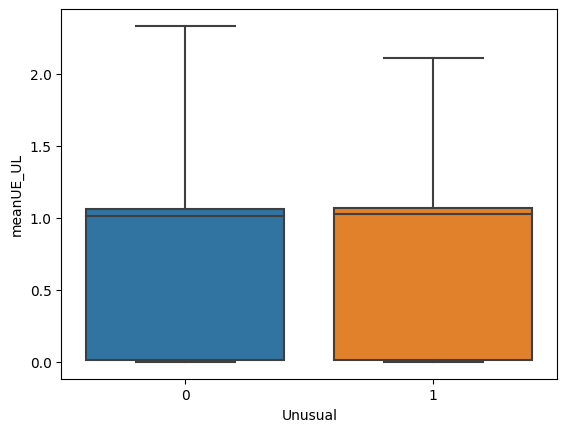

/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


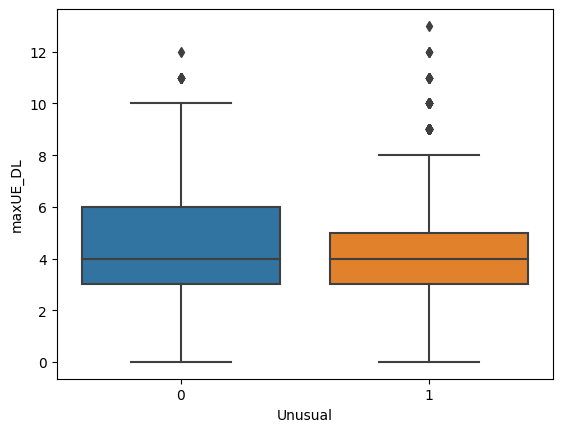

/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


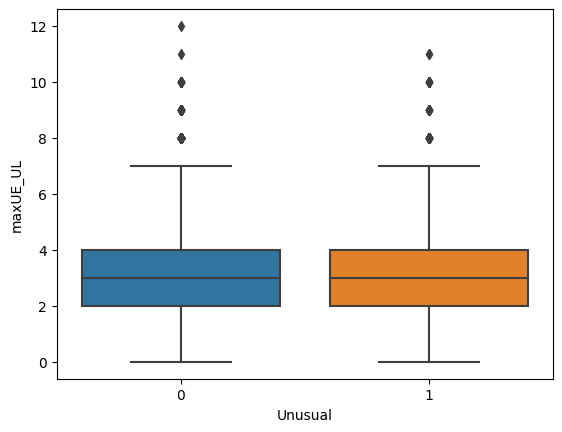

/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


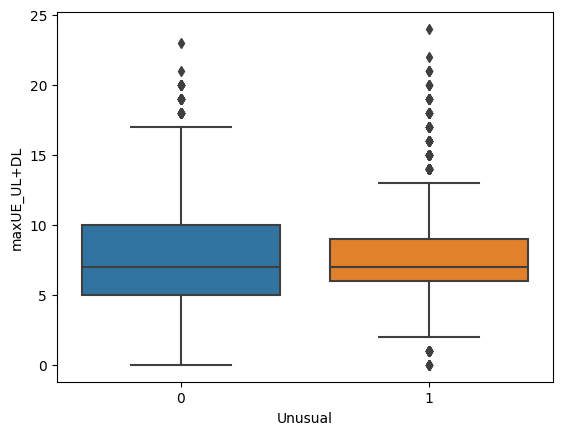

/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


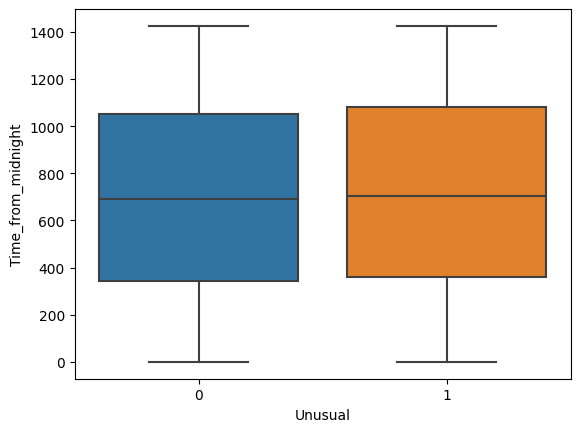

In [43]:
#Boxplots for all features (excluding Time and CellName)
variables = ["PRBUsageUL", "PRBUsageDL","meanThr_DL","meanThr_UL","maxThr_DL", "maxThr_UL", "meanUE_DL","meanUE_UL","maxUE_DL","maxUE_UL","maxUE_UL+DL", "Time_from_midnight"]

for i in variables[0:-1]: #excluding "Time_from_midnight"
    sns.boxplot(x = df["Unusual"], y = df[i])
    plt.show()

In [14]:
#Removing outlier for meanUE_UL

Q1, Q3 = np.percentile(df.meanUE_UL,[25,75])

IQR = Q3 - Q1

df = df[df.meanUE_UL < IQR * 1.5 + Q3]

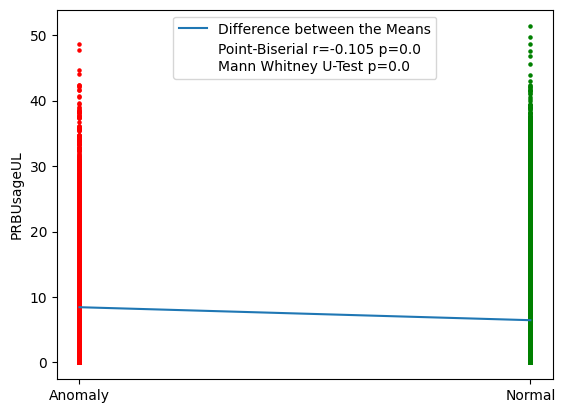

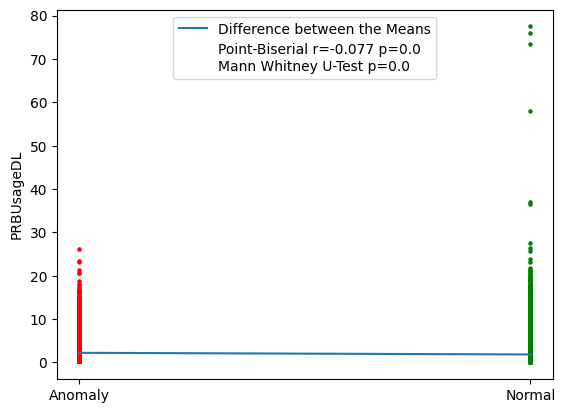

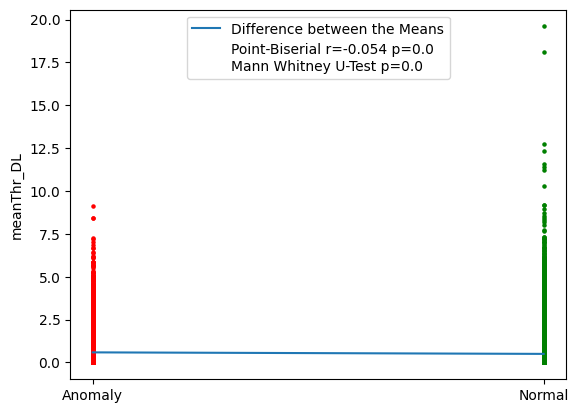

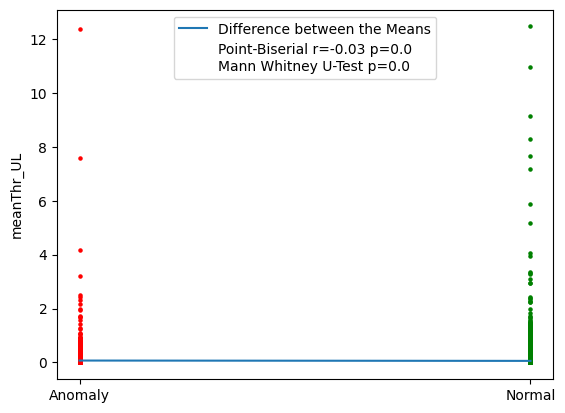

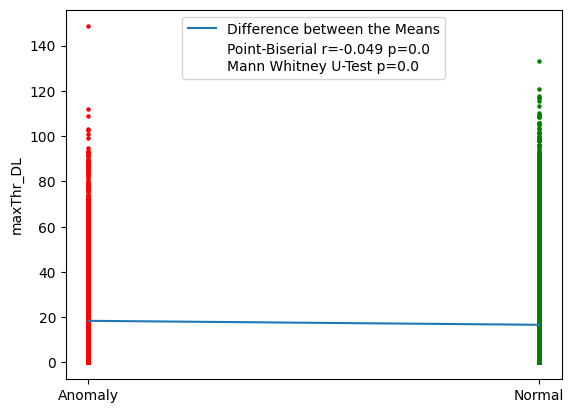

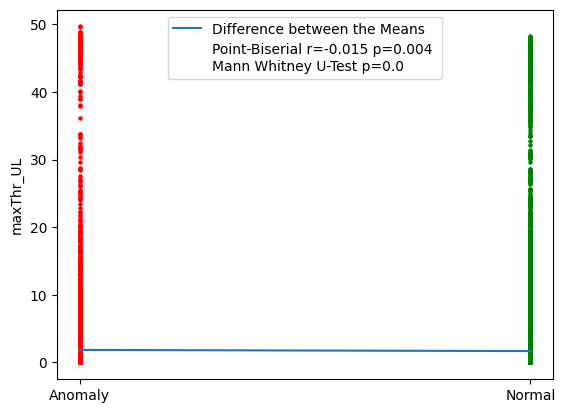

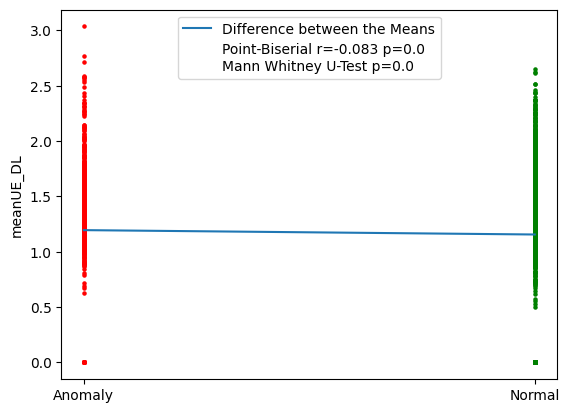

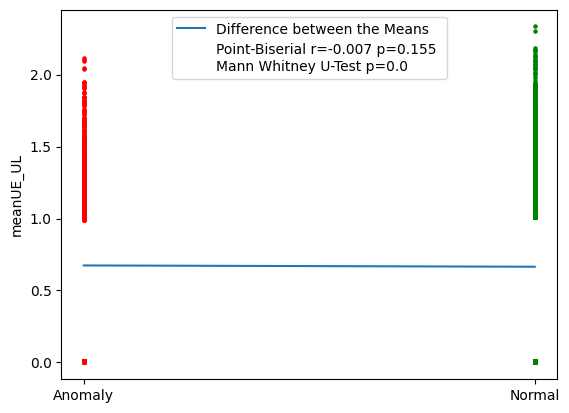

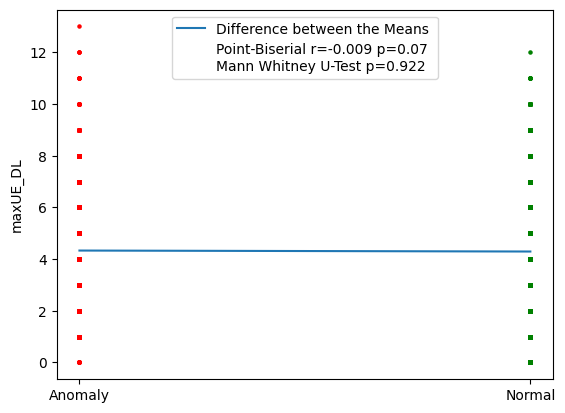

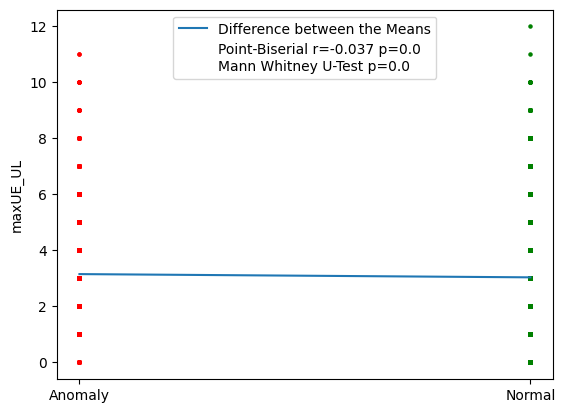

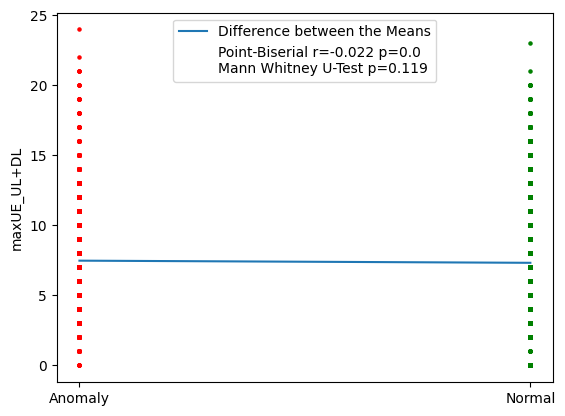

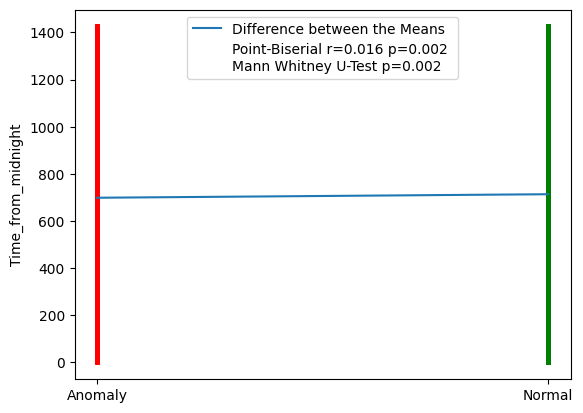

In [47]:
#Determining if there is a statistically significant difference in the values of metric variables when anomalous and when normal

for i in variables:
    coeff, p_value = stats.pointbiserialr(df.Unusual, df[i]) # Point biserial correlation for binary variable
    plt.scatter(["Anomaly"] * len(Anomalous_df[i]), Anomalous_df[i], s = 5, color = 'red')
    plt.scatter(["Normal"] * len(Normal_df[i]), Normal_df[i], s = 5, color = 'green')

    #Normality test to determine whether mann whitney u test or t test should be used, just so happens that everything here is not normally distributed
    if shapiro(df[i])[1] < 0.05: #Level of significance (a-value) is 0.05
        Test_Type = 'Mann Whitney U-Test'
        statistic, p_value2 = stats.mannwhitneyu(Anomalous_df[i], Normal_df[i])
    else:
        Test_Type = 'T-Test (independent)'
        statistic, p_value2 = stats.ttest_ind(Anomalous_df[i], Normal_df[i])
        
    plt.plot([0,1],[np.mean(Normal_df[i]),np.mean(Anomalous_df[i])], label = f'Difference between the Means')
    plt.ylabel(i)
    text = f"Point-Biserial r={round(coeff,3)} p={round(p_value,3)} \n{Test_Type} p={round(p_value2,3)}"
    plt.axhline(0, alpha = 0, label = f"Point-Biserial r={round(coeff,3)} p={round(p_value,3)} \n{Test_Type} p={round(p_value2,3)}")
    plt.legend(loc = 'upper center')
    plt.show()



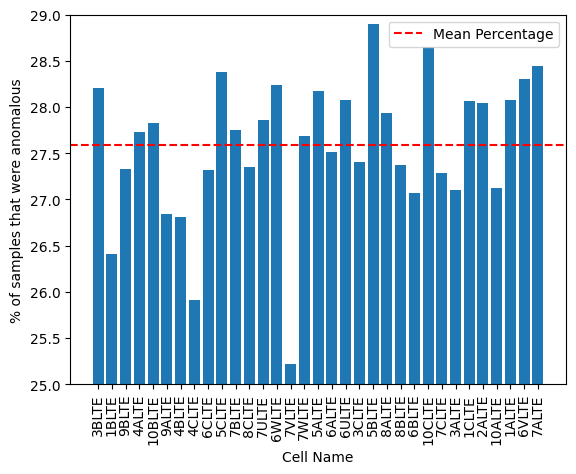

In [ ]:
#Creating a bar chart showcasing whether CellName feature affects probability of having anomalies

#Obtaining sum of anomalies and total count for each cell to determine percentage of instances being anomalies for each cell
Percentages = []

for i in Cells:
    globals()[f"{i}_Unusual"] = df.groupby("CellName").Unusual.sum()[i]
    globals()[f"{i}_Count"] = df.groupby("CellName").Unusual.count()[i]
    globals()[f"{i}_Percentage"] = globals()[f"{i}_Unusual"] / globals()[f"{i}_Count"] * 100
    Percentages.append(globals()[f"{i}_Percentage"])

#Graph of percentage of abnormal behaviour for each cell
plt.bar(Cells,Percentages)
plt.ylim(25,29)
plt.xlabel("Cell Name")
plt.ylabel("% of samples that were anomalous")
plt.axhline(np.mean(Percentages),label = 'Mean Percentage', linestyle = '--', color = 'red')
plt.xticks(rotation = 90) 
plt.legend()
plt.show()

In [ ]:
#Chi square test for CellName
Frequencies = []

#Adding frequencies for anomalous behaviour and normal behaviour
for i in Cells:
    Frequencies.append(len(Anomalous_df.groupby("CellName").get_group(i)))
    Frequencies.append(len(Normal_df.groupby("CellName").get_group(i)))

Frequencies = np.reshape(Frequencies, (-1,2))

Chi_statistic, Chi_p_value, dof, expected = stats.chi2_contingency(Frequencies)

print(Chi_statistic, Chi_p_value) #CellName does not have a significant effect on the anomalous and normal behaviour (p > 0.999)

10.41281879980016 0.9998909944097953


In [ ]:
#Creating the categorical feature "hour"
hour = Time.dt.hour     

In [ ]:
#Chi Square test for Hour
Frequencies_Hour = []

#Adding frequencies for anomalous and normal behaviour
for i in np.arange(24): # 24 Hours
    Frequencies_Hour.append(np.sum((hour == i) & (df.Unusual == 1)))
    Frequencies_Hour.append(np.sum((hour == i) & (df.Unusual == 0)))

Frequencies_Hour = np.reshape(Frequencies_Hour, (-1,2))

Chi_statistic, Chi_p_value, dof, expected = stats.chi2_contingency(Frequencies_Hour)

print(Chi_statistic, Chi_p_value) #Hours does not have a significant effect on the anomalous and normal behaviour (p > 0.05)

17.893951201140318 0.7632159966721168


In [ ]:
#Creating new features based on whether "MeanUE_DL" and "MeanUE_UL" is 0 or not (if its 0, encoded as 1, if its not 0, encoded as 0)
df['MeanUE_DL_Encoded'] = df.meanUE_DL.apply(lambda x: 1 if x == 0 else 0)
df['MeanUE_UL_Encoded'] = df.meanUE_UL.apply(lambda x: 1 if x == 0 else 0)

In [ ]:
#Chi Square test for independence for this new categorical feature
Frequencies_MeanUE_DL_Encoded = [
    [len(df.MeanUE_DL_Encoded[(df['MeanUE_DL_Encoded'] == 1) & (df['Unusual'] == 0)]), len(df.MeanUE_DL_Encoded[(df['MeanUE_DL_Encoded'] == 1) & (df['Unusual'] == 1)])],
    [len(df.MeanUE_DL_Encoded[(df['MeanUE_DL_Encoded'] == 0) & (df['Unusual'] == 0)]), len(df.MeanUE_DL_Encoded[(df['MeanUE_DL_Encoded'] == 0) & (df['Unusual'] == 1)])]
]

Frequencies_MeanUE_UL_Encoded = [
    [len(df.MeanUE_UL_Encoded[(df['MeanUE_UL_Encoded'] == 1) & (df['Unusual'] == 0)]), len(df.MeanUE_UL_Encoded[(df['MeanUE_UL_Encoded'] == 1) & (df['Unusual'] == 1)])],
    [len(df.MeanUE_UL_Encoded[(df['MeanUE_UL_Encoded'] == 0) & (df['Unusual'] == 0)]), len(df.MeanUE_UL_Encoded[(df['MeanUE_UL_Encoded'] == 0) & (df['Unusual'] == 1)])]
]

Chi_statistic1, Chi_p_value1, dof1, expected1 = stats.chi2_contingency(Frequencies_MeanUE_DL_Encoded)
print("MeanUE_DL:", Chi_statistic1, Chi_p_value1)

Chi_statistic2, Chi_p_value2, dof2, expected2 = stats.chi2_contingency(Frequencies_MeanUE_UL_Encoded)
print("MeanUE_UL:", Chi_statistic2, Chi_p_value2)

#This categorical feature is significant, where if the value is 0, there is a higher probability that it is normal for both UL and DL

MeanUE_DL: 10.190733717586193 0.0014114814140011812
MeanUE_UL: 3.927480733605437 0.047503056239349646


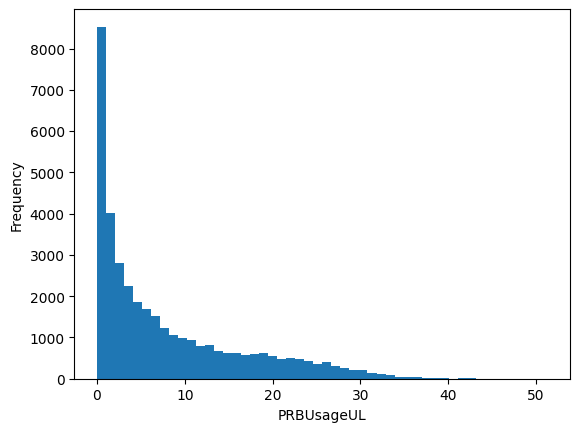

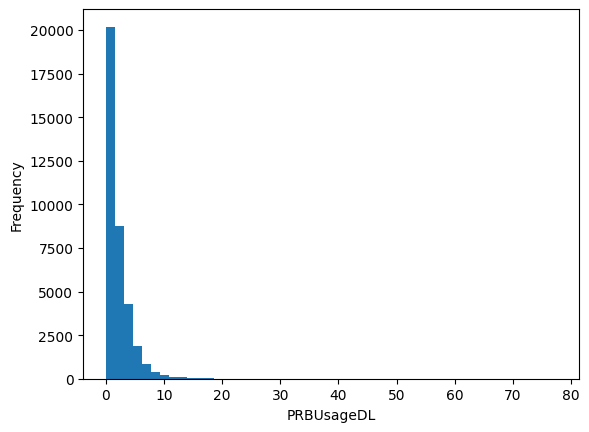

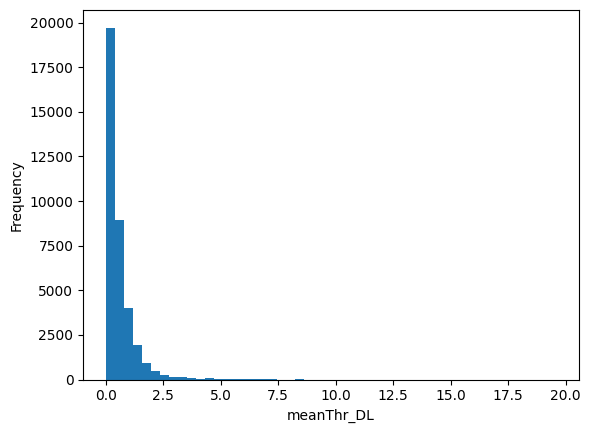

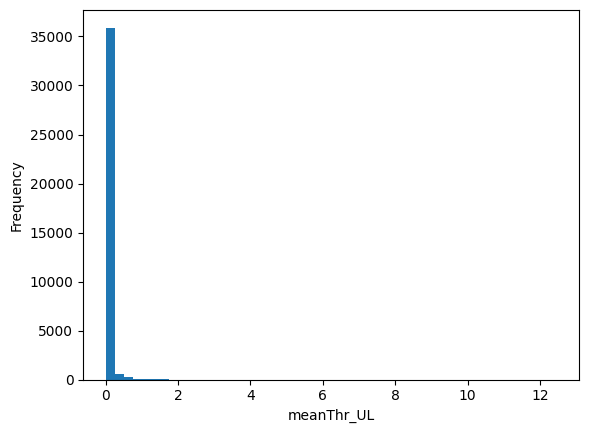

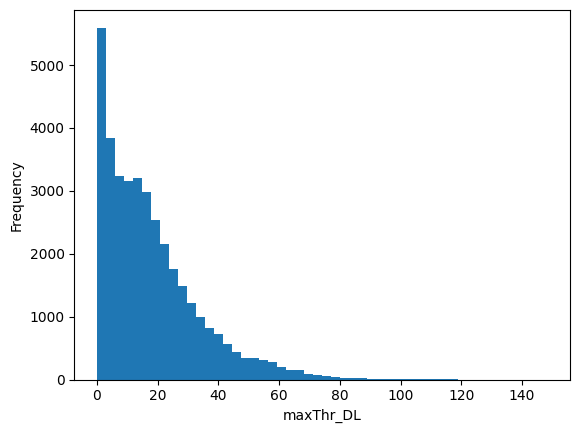

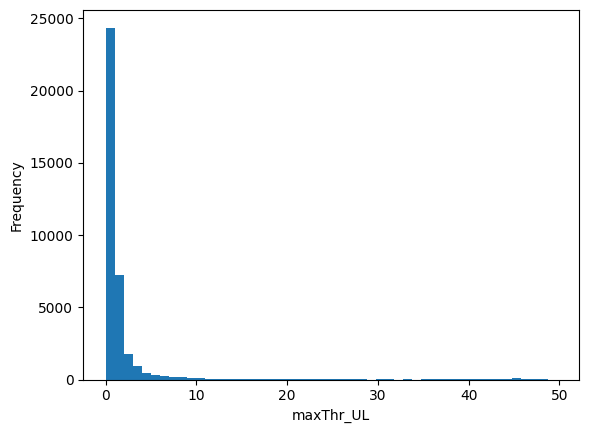

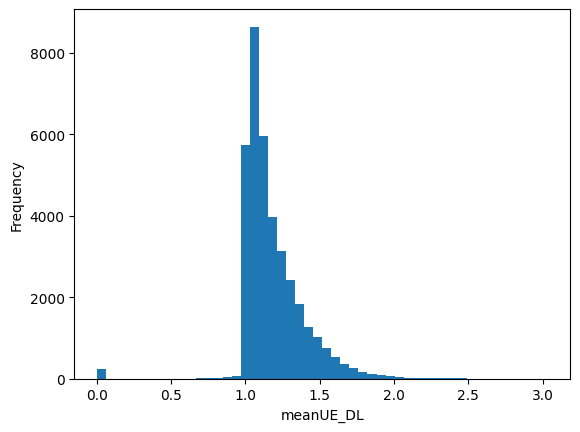

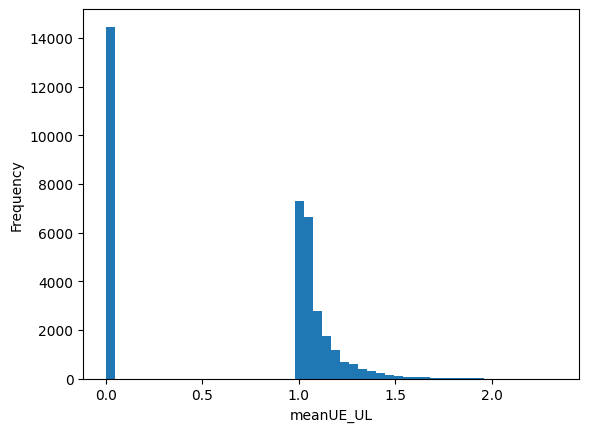

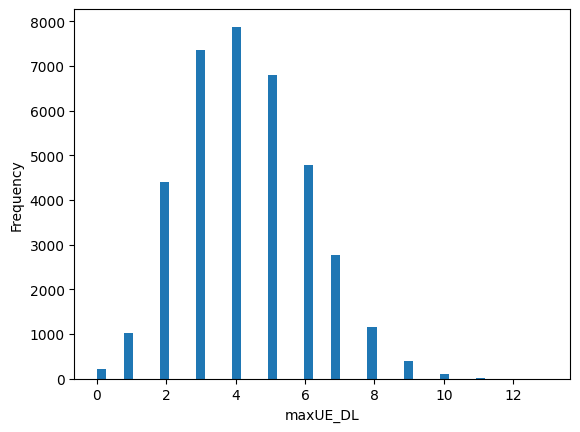

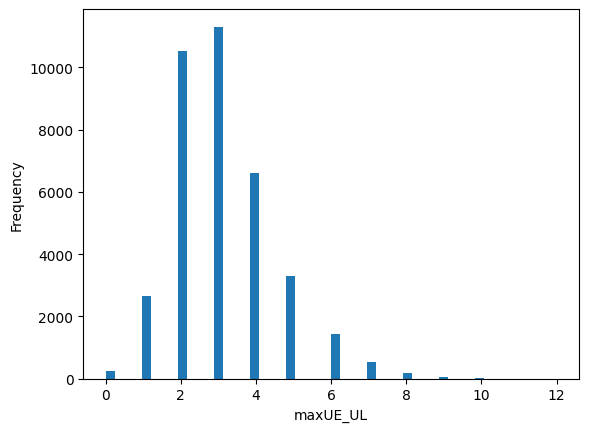

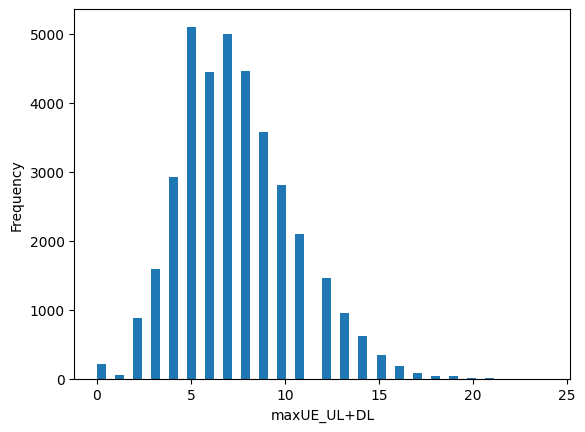

In [ ]:
#Creating histograms for all features
for i in variables:
    plt.hist(df[i], bins = 50)
    plt.xlabel(i)
    plt.ylabel("Frequency")
    plt.show()

# Summary of EDA 
---     

    
### 1. Missing Values
---
No missing values

    
### 2. Outliers
---
Boxplots indicate some outliers, most notable one in "MeanUE_UL" indicated by being 1.5x IQR higher than Q3, outlier was removed
    

### 3. Feature selection
---
##### Metric Features
- **PRBUsageUL:** Used - Significant as mann whitney p < 0.05    
- **PRBUsageDL:** Used - Significant as mann whitney p < 0.05    
- **meanThr_DL:** Used - Significant as mann whitney p < 0.05    
- **meanThr_UL:** Used - Significant as mann whitney p < 0.05    
- **maxThr_DL:** Used - Significant as mann whitney p < 0.05     
- **maxThr_UL:** Used - Significant as mann whitney p < 0.05     
- **meanUE_DL:** Used - Significant as mann whitney p < 0.05     
- **meanUE_UL:** Used - Significant as mann whitney p < 0.05, point biserial p-value is not significant (p = 0.152),   
however not as reliable as assumption of normality is violated     
- **maxUE_DL:** Not Used - Not Significant as mann whitney p > 0.05 (p = 0.917)   
- **maxUE_UL:** Used - Significant as mann whitney p < 0.05   
- **maxUE_ULDL:** Not Used - Not significant as mann whitney p > 0.05 (p =  0.118)
- **Time_from_midnight:** Used - Significant as mann whitney p < 0.05

Features **maxUE_DL** and **maxUE_ULDL** will not be used due to the lack of significance.

##### Categorical Features
- **CellName:** Not Used - Not significant as chi-square test for homogeneity p > 0.05 (p = 0.999),    
further supported by bar graph of percentage of anomalous behaviour for each cell which is relatively equal for all cells.   
- **Hours:** Not Used - Not significant as chi-square test for homogeneity p > 0.05 (p = 0.763)
- **MeanUE_DL_Encoded:** Used - Significant as chi-square test for independence p < 0.05 
- **MeanUE_UL_Encoded:** Used - Significant as chi-square test for independence p < 0.05

Features **CellName** and **Hours** will not be used due to the lack of significance.

### 4. Histograms / Distributions
---
All distributions are non-normal (backed by shapiro test from previous section)

**PRBUsageUL, PRBUsageDL, meanThr_DL, meanThr_UL, maxThr_DL, maxThr_UL** - Features that have an exponential distribution with a long tail, indicating a potential log transformation during feature engineering.

**meanUE_DL, meanUE_UL** - Features that have a large spike at 0 and an exponential distribution peaking around 1, indicating a potential categorical feature of whether or not the value is 0. Log transformation may also be possible.

**maxUE_DL, maxUE_UL, maxUE_UlDL**  - Integer features which have a right-skewed normal distribution.